In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/91754/Downloads/Fraud.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df = df.rename(columns={'nameOrig': 'Name', 'oldbalanceOrg': 'Old Bal', 'newbalanceOrig':'New Bal','nameDest':'Name Dest',
                        'oldbalanceDest':'Old dest','newbalanceDest':'New dest', 'isFraud':'Fraud','isFlaggedFraud':'Flagged'})
df.head()

,step,type,amount,Name,Old Bal,New Bal,Name Dest,Old dest,New dest,Fraud,Flagged
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
avgnewbal= df['New Bal'].mean()
rmean=round(avgnewbal, 2)
print(rmean)

855113.67


In [6]:
df['New Bal'].replace(0.00, rmean)

0          160296.36
1           19384.72
2          855113.67
3          855113.67
4           29885.86
             ...    
6362615    855113.67
6362616    855113.67
6362617    855113.67
6362618    855113.67
6362619    855113.67
Name: New Bal, Length: 6362620, dtype: float64

In [7]:
df.head()

,step,type,amount,Name,Old Bal,New Bal,Name Dest,Old dest,New dest,Fraud,Flagged
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df['New Bal'] = df['New Bal'].replace(0, rmean)

In [9]:
df.head()

,step,type,amount,Name,Old Bal,New Bal,Name Dest,Old dest,New dest,Fraud,Flagged
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,855113.67,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,855113.67,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


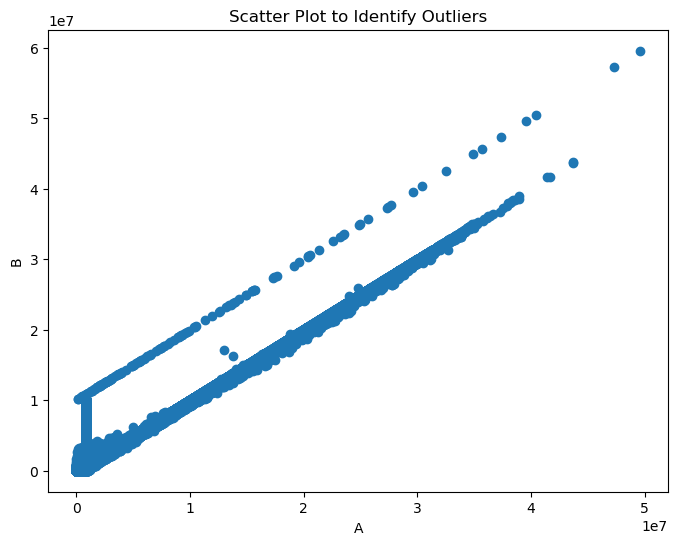

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['New Bal'], df['Old Bal'])
plt.title('Scatter Plot to Identify Outliers')
plt.xlabel('A')
plt.ylabel('B')
plt.show()

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Define features (X) and target (y)
X = df[['amount','Old Bal','New Bal','Old dest','New dest']]  # Features (independent variable)
y = df['Flagged']             # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [15]:
# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.354588948105659e-06
R-squared: 0.001240663205767878


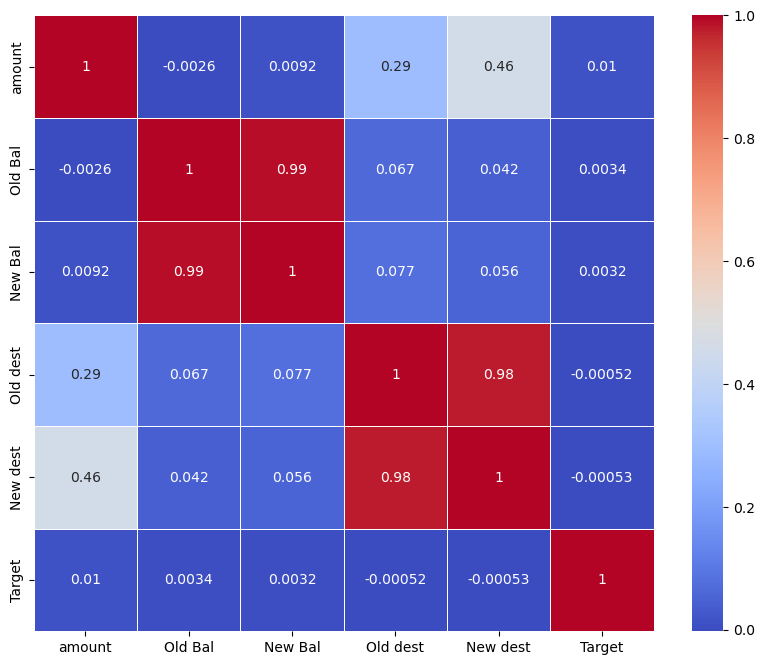

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train for correlation analysis
data_for_corr = X_train.copy()
data_for_corr['Target'] = y_train

# Calculate correlation matrix
corr_matrix = data_for_corr.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [ ]:
import seaborn as sns
# Combine features and predictions into a single DataFrame for plotting
plot_data = X_train.copy()
plot_data['Predictions'] = model.predict(X_train)

# Plot pairplot
sns.pairplot(plot_data)
plt.show()